<h1>Importando bibliotecas</h1>

In [26]:
import pandas as pd
import numpy as np

<h1>Extraindo os dados</h1>

In [16]:
path = 'C:/Users/Joao/Livro/Livro/pydata-book/datasets/bitly_usagov/example.txt'

<h4>Entendendo o formato dos dados:</h4>

In [18]:
with open(path) as f:
    print(f.readline())

{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



<h6>Formato: JSON</h6>
<ul><h6>Precisamos formatar os dados antes de entender o que pode ser feito:</h6></ul>
<ul><h6><li>Vamos usar a biblioteca json para resolver isso</li></h6></ul>

In [77]:
import json

#transformando a string json em um dicionario python
with open(path) as f:
    registros = [json.loads(line) for line in f]

registros[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

<h1>Contagem de fusos horários em python puro</h1>

<h4>Encontrando fusos horários que ocorrem com mais frequência no conjunto de dados (campo <u>tz</u>)</h4>

<h6>Extraindo uma lista de fusos horários novamente usando list comprehension:</h6>

In [80]:
fuso_horario = [registro["tz"] for registro in registros]

KeyError: 'tz'

<h6>Esse erro ocorre porque nem todos os registros possuem o campo <u>tz</u>, podemos resolver isso fazendo uma verificação antes de adicionarmos a nossa lista</h6>

In [95]:
fuso_horario = [registro["tz"] for registro in registros if "tz" in registro]

In [97]:
fuso_horario[0:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

<h6>Gerando contagens de fusos-horários</h6>

<h6>Maneira difícil:</h6>

In [114]:
def contagens(sequencia):
    contagem= {}
    for x in sequencia:
        if x in contagem:
            contagem[x] += 1
        else:
            contagem[x] = 1
    return contagem

In [116]:
contagem = contagens(fuso_horario)
contagem["America/New_York"]

1251

<h6>Usando a biblioteca <u>Collections</u> padrão do python</h6>

In [145]:
from collections import defaultdict

def contagens2(sequencia):
    contagem = defaultdict(int) #os valores serão inicializados com 0 
    for x in sequence:
        contagem[x] += 1
    return contagem
    

<h6>Se quisessemos ver os dez fusos horários principais e suas contagens poderiamos criar uma lista de tuplas <u>(contagem, fuso-horario)</u></h6>

<h6>Top principais fusos horários</h6>

In [127]:
def top_contagens(dict_contagem, n=10):
    pares_chave_valor = [(contagem, tz) for tz, contagem in dict_contagem.items()]
    pares_chave_valor.sort()
    return pares_chave_valor[-n:]

In [129]:
top_contagens(contagem)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

<h6>Usando a biblioteca <u>Collections</u> padrão do python</h6>

In [139]:
from collections import Counter

contagem = Counter(fuso_horario)

contagem.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

<h1>Contagem de fusos horários com o pandas</h1>

<h6>Criando um dataframe:</h6>

In [150]:
frame = pd.DataFrame(registros)

In [152]:
frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...,US,1.0,America/New_York,NJ,e5SvKE,fqPSr9,tweetdeckapi,en,1.usa.gov,direct,http://www.fda.gov/AdvisoryCommittees/Committe...,1.331927e+09,1.301298e+09,Paramus,"[40.9445, -74.07]",NaN,NaN
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,US,0.0,America/Chicago,OK,jQLtP4,jQLtP4,bitly,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.okc.gov/PublicNotificationSystem/Fo...,1.331927e+09,1.307530e+09,Oklahoma City,"[35.4715, -97.518997]",NaN,NaN
3557,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331927e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
3558,GoogleProducer,US,0.0,America/Los_Angeles,CA,zjtI4X,zjtI4X,bitly,NaN,1.usa.gov,direct,http://www.ahrq.gov/qual/qitoolkit/,1.331927e+09,1.327529e+09,Mountain View,"[37.419201, -122.057404]",NaN,NaN


<h4>Vendo informações básicas sobre o novo DataFrame</h4>

In [160]:
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [162]:
frame["tz"].head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

<h6>Realizando contagem dos fusos-horários através do método <u>value_counts</u></h6>

In [181]:
fh_contagem = frame["tz"].value_counts()
fh_contagem.head()

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

<h1>Visualizando informação</h1>

<h6>Realizando limpeza dos dados</h6>

In [187]:
fh_limpo = frame["tz"].fillna("Faltante")
fh_limpo[fh_limpo == ""] = "Indisponivel"

In [189]:
fh_contagem = fh_limpo.value_counts()
fh_contagem.head()

tz
America/New_York       1251
Indisponivel            521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Name: count, dtype: int64

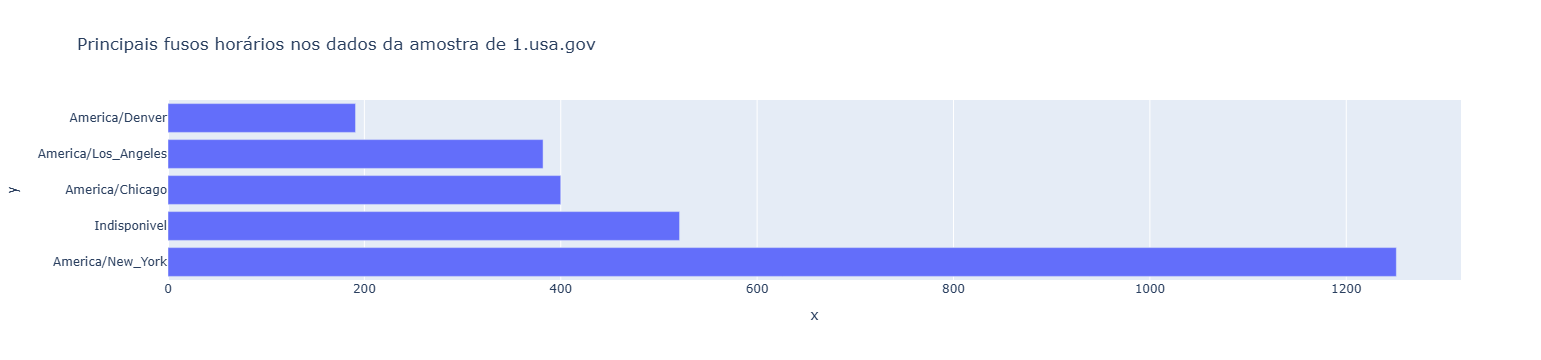

In [356]:
import plotly.express as px

subconjunto = fh_contagem.head()

px.bar(y=subconjunto.index, x=subconjunto.to_numpy(), title="Principais fusos horários nos dados da amostra de 1.usa.gov")

<h1>Fazendo parsing das informações presentes no campo <u>a</u></h1>

<h4>Dividindo o primeiro token da string (<b>correspondente aos recursos de navegador</b>) e criando outro resumo do comportamento dos usuários</h4>

In [204]:
resultados = pd.Series([x.split()[0] for x in frame["a"].dropna()])

In [206]:
resultados

0                  Mozilla/5.0
1       GoogleMaps/RochesterNY
2                  Mozilla/4.0
3                  Mozilla/5.0
4                  Mozilla/5.0
                 ...          
3435               Mozilla/4.0
3436               Mozilla/5.0
3437    GoogleMaps/RochesterNY
3438            GoogleProducer
3439               Mozilla/4.0
Length: 3440, dtype: object

In [208]:
resultados.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

<h4>Usuários de Windows e não Windows</h4>

In [222]:
cframe = frame[frame["a"].notna()].copy()

In [226]:
cframe["os"] = np.where(cframe["a"].str.contains("Windows"), "Windows", "Não Windows")
cframe["os"].head(5)

0        Windows
1    Não Windows
2        Windows
3    Não Windows
4        Windows
Name: os, dtype: object

<h4>Agrupando os dados por sua coluna de fusos horários e a nova lista de sistemas operacionais</h4>

In [237]:
fh_os = cframe.groupby(["tz","os"])

<h4>Contagem dos valores</h4>

In [240]:
agg_contagem = fh_os.size().unstack().fillna(0)
agg_contagem.head()

os,Não Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0


<h4>Principais fusos horários:</h4>

<h6>Construindo um array de indices a partir das contagens de linhas de <u>agg_contagem</u></h6>

In [255]:
indexador = agg_contagem.sum("columns").argsort()
indexador.values[:10]

array([24, 20, 21, 92, 87, 53, 54, 57, 26, 55], dtype=int64)

<h6>Usando o <u>take</u> para selecionar as linhas nessa ordem e fatiar a últimas dez linhas:</h6>

In [298]:
subconjunto_contagem = agg_contagem.take(indexador[-10:])
subconjunto_contagem

os,Não Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


<h6>O pandas tem um método chamado <u>nlargest</u> que faz a mesma coisa</h6>

In [301]:
agg_contagem.sum(axis=1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

<h1>Visualizando informações</h1>

<h4>Comparando o número de usuários windows e não usuários windows</h4>

<h6>Redefinindo o indice para reorganizar os dados</h6>

In [306]:
subconjunto_contagem = subconjunto_contagem.stack()
subconjunto_contagem.name = "total"
subconjunto_contagem = subconjunto_contagem.reset_index()
subconjunto_contagem.head(10)

,tz,os,total
0,America/Sao_Paulo,Não Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Não Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Não Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Não Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Não Windows,43.0
9,Europe/London,Windows,31.0


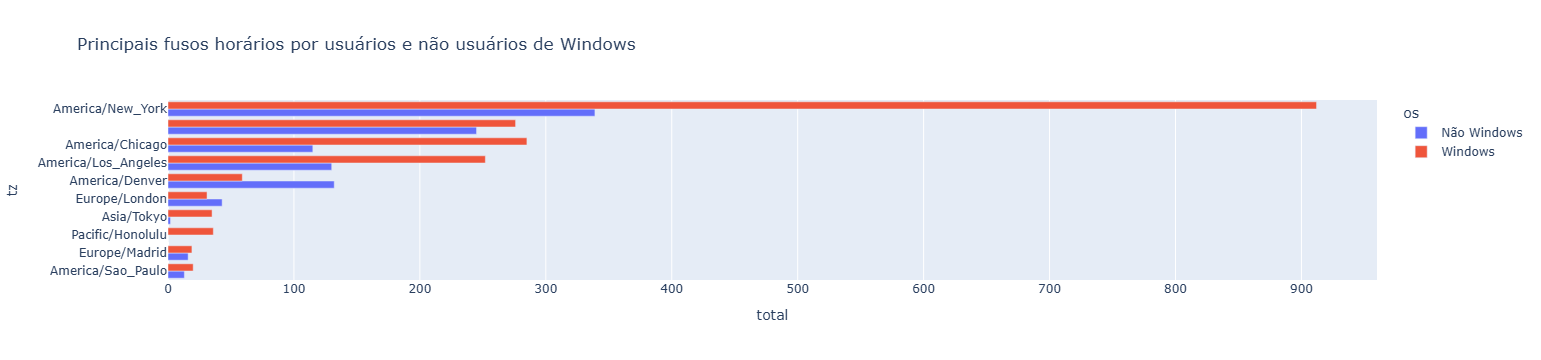

In [352]:
px.bar(subconjunto_contagem,
       x="total", 
       y="tz", 
       color="os",
       orientation="h", 
       barmode="group", 
       title="Principais fusos horários por usuários e não usuários de Windows")

<h6>Normalizando os percentuais dos grupos para facilitar a visualização</h6>

In [340]:
def normalizacao(grupo):
    grupo["total_normalizado"] = grupo["total"]/grupo["total"].sum()
    return grupo

resultados = subconjunto_contagem.groupby("tz").apply(normalizacao)
resultados

C:\Users\Joao\AppData\Local\Temp\ipykernel_1188\1926189272.py:5: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



tz           os  total  \
tz                                                                
                    16                       Não Windows  245.0   
                    17                           Windows  276.0   
America/Chicago     14      America/Chicago  Não Windows  115.0   
                    15      America/Chicago      Windows  285.0   
America/Denver      10       America/Denver  Não Windows  132.0   
                    11       America/Denver      Windows   59.0   
America/Los_Angeles 12  America/Los_Angeles  Não Windows  130.0   
                    13  America/Los_Angeles      Windows  252.0   
America/New_York    18     America/New_York  Não Windows  339.0   
                    19     America/New_York      Windows  912.0   
America/Sao_Paulo   0     America/Sao_Paulo  Não Windows   13.0   
                    1     America/Sao_Paulo      Windows   20.0   
Asia/Tokyo          6            Asia/Tokyo  Não Windows    2.0   
                    7            Asia/Tokyo      Windows   35.0   
Europe/London       8         Europe/London  Não Windows   43.0   
                    9         Europe/London      Windows   31.0   
Europe/Madrid       2         Europe/Madrid  Não Windows   16.0   
                    3         Europe/Madrid      Windows   19.0   
Pacific/Honolulu    4      Pacific/Honolulu  Não Windows    0.0   
                    5      Pacific/Honolulu      Windows   36.0   

                        total_normalizado  
tz                                         
                    16           0.470250  
                    17           0.529750  
America/Chicago     14           0.287500  
                    15           0.712500  
America/Denver      10           0.691099  
                    11           0.308901  
America/Los_Angeles 12           0.340314  
                    13           0.659686  
America/New_York    18           0.270983  
                    19           0.729017  
America/Sao_Paulo   0            0.393939  
                    1            0.606061  
Asia/Tokyo          6            0.054054  
                    7            0.945946  
Europe/London       8            0.581081  
                    9            0.418919  
Europe/Madrid       2            0.457143  
                    3            0.542857  
Pacific/Honolulu    4            0.000000  
                    5            1.000000

<h6>Usando o método <u>transform</u> com o <u>groupby</u></h6>

In [330]:
g = subconjunto_contagem.groupby("tz")
restultados2 = subconjunto_contagem["total"] / g["total"].transform("sum")

<h6>Usando <u>normalize=True</u> no <u>value_counts</u> para frequências</h6>

In [334]:
resultados3 = subconjunto_contagem["tz"].value_counts(normalize=True)

<h6>Visualização final:</h6>

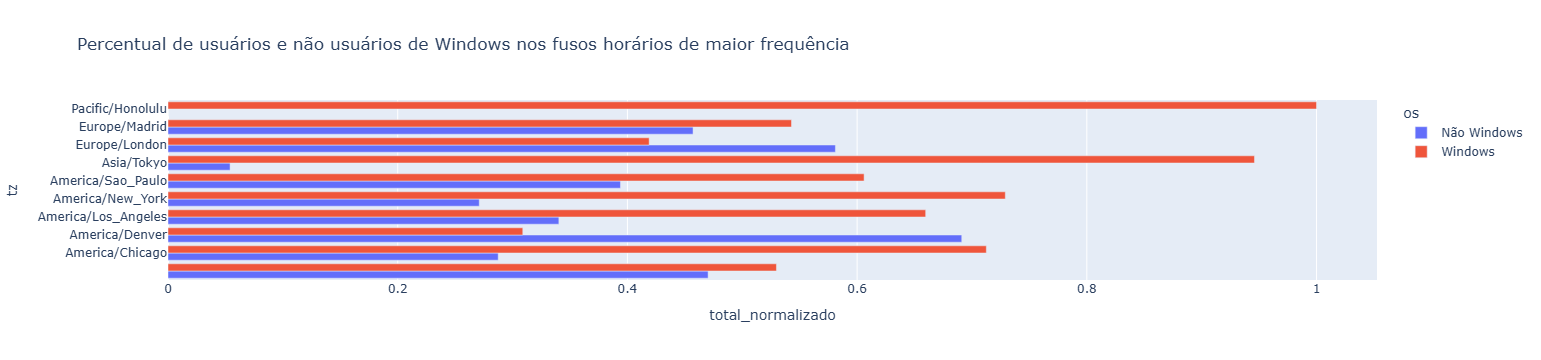

In [348]:
px.bar(resultados, 
       x=resultados["total_normalizado"], 
       y="tz", color="os", 
       barmode="group",
       title = "Percentual de usuários e não usuários de Windows nos fusos horários de maior frequência")